In [118]:
#import dependancies
import pandas as pd
import os
import csv
import requests
import json
from config import api_key
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [39]:
titles = []
movie_year = []
year =[]
winner =[]
imdb = []
meta = []
tomatoes = []
imdb_count =[]
year_check = []

In [40]:
#Import CSV
csvpath = os.path.join('..', 'the_oscar_award.csv')

with open(csvpath) as csvfile:

    # CSV reader specifies delimiter and variable that holds contents
    csvreader = csv.reader(csvfile, delimiter=',')


    # Read the header row first (skip this step if there is now header)
    csv_header = next(csvreader)

    # Read each row of data after the header
    for row in csvreader:
        titles.append(row[5])
        movie_year.append(row[0])
        year.append(row[1])
        winner.append(row[6])
        
print(len(titles))
print(len(year))
print(len(winner))

10395
10395
10395


In [41]:
movie_list = pd.DataFrame({
    "title": titles,
    "movie_year": movie_year,
    "year": year,
    "winner":winner

})
movie_list

,title,movie_year,year,winner
0,The Noose,1927,1928,False
1,The Last Command,1927,1928,True
2,A Ship Comes In,1927,1928,False
3,7th Heaven,1927,1928,True
4,Sadie Thompson,1927,1928,False
...,...,...,...,...
10390,Parasite,2019,2020,True
10391,,2019,2020,True
10392,,2019,2020,True
10393,,2019,2020,True


In [42]:
winner_list = movie_list[movie_list.winner.eq("True")]
print(winner_list.shape)

(2357, 4)


In [43]:
clean_list = winner_list.drop_duplicates()

In [44]:
print((clean_list))

                       title movie_year  year winner
1           The Last Command       1927  1928   True
3                 7th Heaven       1927  1928   True
6                  The Dove;       1927  1928   True
9                    Sunrise       1927  1928   True
11       Two Arabian Knights       1927  1928   True
...                      ...        ...   ...    ...
10338              Rocketman       2019  2020   True
10357              Hair Love       2019  2020   True
10363  The Neighbors' Window       2019  2020   True
10382            Jojo Rabbit       2019  2020   True
10391                              2019  2020   True

[1376 rows x 4 columns]


In [45]:
url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="     
movie_test = requests.get(url + "The Last Command").json()
pprint(movie_test)

{'Actors': 'Emil Jannings, Evelyn Brent, William Powell, Jack Raymond',
 'Awards': 'Won 1 Oscar. Another 1 win & 3 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': 'N/A',
 'Director': 'Josef von Sternberg',
 'Genre': 'Drama, History, Romance, War',
 'Language': 'None, English',
 'Metascore': 'N/A',
 'Plot': 'A former Imperial Russian general and cousin of the Czar ends up in '
         'Hollywood as an extra in a movie directed by a former revolutionary.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNGVhZmVkNmEtMjUyMC00YTFhLWIzMmEtNmQxMmE1NTBhMjQyXkEyXkFqcGdeQXVyMjgyNjk3MzE@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'Not Rated',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '100%'}],
 'Released': '21 Jan 1928',
 'Response': 'True',
 'Runtime': '88 min',
 'Title': 'The Last Command',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Lajos Biró (story), John F. Goodrich,

In [46]:
for index, row in clean_list.iterrows():
    print(row["title"], row["year"])

The Last Command 1928
7th Heaven 1928
The Dove; 1928
Sunrise 1928
Two Arabian Knights 1928
Wings 1928
Underworld 1928
 1928
In Old Arizona 1929
Coquette 1929
The Bridge of San Luis Rey 1929
White Shadows in the South Seas 1929
The Divine Lady 1929
The Broadway Melody 1929
The Patriot 1929
Disraeli 1930
The Divorcee 1930
King of Jazz 1930
With Byrd at the South Pole 1930
All Quiet on the Western Front 1930
The Big House 1930
A Free Soul 1931
Min and Bill 1931
Cimarron 1931
Tabu 1931
Skippy 1931
 1931
The Dawn Patrol 1931
The Champ 1932
Dr. Jekyll and Mr. Hyde 1932
The Sin of Madelon Claudet 1932
Transatlantic 1932
Shanghai Express 1932
Bad Girl 1932
Grand Hotel 1932
Flowers and Trees 1932
The Music Box 1932
Wrestling Swordfish 1932
 1932
The Private Life of Henry VIII 1933
Morning Glory 1933
Cavalcade 1933
 1933
A Farewell to Arms 1933
The Three Little Pigs 1933
So This Is Harris 1933
Krakatoa 1933
Little Women 1933
One Way Passage 1933
It Happened One Night 1935
The Merry Widow 1935
Vi

It's a Mad, Mad, Mad, Mad World 1964
 1964
My Fair Lady 1965
Topkapi 1965
Mary Poppins 1965
Zorba the Greek 1965
The Night of the Iguana 1965
Jacques-Yves Cousteau's World without Sun 1965
Nine from Little Rock 1965
Yesterday, Today and Tomorrow 1965
The Pink Phink 1965
Casals Conducts: 1964 1965
Goldfinger 1965
Becket 1965
Father Goose 1965
 1965
Cat Ballou 1966
A Thousand Clowns 1966
Darling 1966
A Patch of Blue 1966
Ship of Fools 1966
Doctor Zhivago 1966
The Sound of Music 1966
The Eleanor Roosevelt Story 1966
To Be Alive! 1966
The Shop on Main Street 1966
The Sandpiper 1966
The Dot and the Line 1966
The Chicken (Le Poulet) 1966
The Great Race 1966
Thunderball 1966
 1966
A Man for All Seasons 1967
The Fortune Cookie 1967
Who's Afraid of Virginia Woolf? 1967
Fantastic Voyage 1967
The War Game 1967
A Year toward Tomorrow 1967
Grand Prix 1967
A Man and a Woman 1967
Born Free 1967
A Funny Thing Happened on the Way to the Forum 1967
Herb Alpert and the Tijuana Brass Double Feature 1967
W

Mystic River 2004
Monster 2004
Cold Mountain 2004
Finding Nemo 2004
The Lord of the Rings: The Return of the King 2004
Master and Commander: The Far Side of the World 2004
The Fog of War 2004
Chernobyl Heart 2004
The Barbarian Invasions 2004
Harvie Krumpet 2004
Two Soldiers 2004
Lost in Translation 2004
 2004
Ray 2005
Million Dollar Baby 2005
The Aviator 2005
The Incredibles 2005
Born into Brothels 2005
Mighty Times: The Children's March 2005
The Sea Inside 2005
Lemony Snicket's A Series of Unfortunate Events 2005
Finding Neverland 2005
The Motorcycle Diaries 2005
Ryan 2005
Wasp 2005
Spider-Man 2 2005
Sideways 2005
Eternal Sunshine of the Spotless Mind 2005
 2005
Capote 2006
Syriana 2006
Walk the Line 2006
The Constant Gardener 2006
Wallace & Gromit in The Curse of the Were-Rabbit 2006
Memoirs of a Geisha 2006
Brokeback Mountain 2006
March of the Penguins 2006
A Note of Triumph: The Golden Age of Norman Corwin 2006
Crash 2006
Tsotsi 2006
The Chronicles of Narnia: The Lion, the Witch an

In [47]:
url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="

responses = []

In [48]:
for index, row in clean_list.iterrows():
    movie_data = requests.get(url + row['title'] +"&y="+ row['movie_year']).json()
    try:
        if movie_data["Year"] == row["movie_year"]: 
            responses.append(movie_data)
            try:
                imdb.append(movie_data["imdbRating"])
            except:
                imdb.append("N/A")
            try:
                imdb_count.append(movie_data["imdbVotes"])
            except:
                imdb_count.append("N/A")
            try:   
                meta.append(movie_data["Metascore"])
            except:
                meta.append("N/A")
            try:                      
                tomatoes.append(movie_data["Ratings"][1]["Value"])
            except:
                tomatoes.append("N/A")
            try:
                year_check.append(movie_data["Year"])
            except:
                year_check.append("N/A")  
            print(url + row["title"] +"&y="+ row["year"])
#         elif movie_data = requests.get(url + row['title'] +"&y="+ row['year']).json()
#             movie_data["Year"] == row["year"]:
#             responses.append(movie_data)
#             try:
#                 imdb.append(movie_data["imdbRating"])
#             except:
#                 imdb.append("N/A")
#             try:
#                 imdb_count.append(movie_data["imdbVotes"])
#             except:
#                 imdb_count.append("N/A")
#             try:   
#                 meta.append(movie_data["Metascore"])
#             except:
#                 meta.append("N/A")
#             try:                      
#                 tomatoes.append(movie_data["Ratings"][1]["Value"])
#             except:
#                 tomatoes.append("N/A")
#             try:
#                 year_check.append(movie_data["Year"])
#             except:
#                 year_check.append("N/A")
        else:
            movie_data = requests.get(url + row['title']).json()
            responses.append(movie_data)
            try:
                imdb.append(movie_data["imdbRating"])
            except:
                imdb.append("N/A")
            try:
                imdb_count.append(movie_data["imdbVotes"])
            except:
                imdb_count.append("N/A")
            try:   
                meta.append(movie_data["Metascore"])
            except:
                meta.append("N/A")
            try:                      
                tomatoes.append(movie_data["Ratings"][1]["Value"])
            except:
                tomatoes.append("N/A")
            try:
                year_check.append(movie_data["Year"])
            except:
                year_check.append("N/A")
    except:
        imdb.append("N/A")
        meta.append("N/A")
        tomatoes.append("N/A")
        year_check.append("N/A")
        imdb_count.append("N/A")

http://www.omdbapi.com/?apikey=trilogy&t=7th Heaven&y=1928
http://www.omdbapi.com/?apikey=trilogy&t=The Dove;&y=1928
http://www.omdbapi.com/?apikey=trilogy&t=Sunrise&y=1928
http://www.omdbapi.com/?apikey=trilogy&t=Two Arabian Knights&y=1928
http://www.omdbapi.com/?apikey=trilogy&t=Wings&y=1928
http://www.omdbapi.com/?apikey=trilogy&t=Underworld&y=1928
http://www.omdbapi.com/?apikey=trilogy&t=In Old Arizona&y=1929
http://www.omdbapi.com/?apikey=trilogy&t=White Shadows in the South Seas&y=1929
http://www.omdbapi.com/?apikey=trilogy&t=The Divine Lady&y=1929
http://www.omdbapi.com/?apikey=trilogy&t=The Patriot&y=1929
http://www.omdbapi.com/?apikey=trilogy&t=Disraeli&y=1930
http://www.omdbapi.com/?apikey=trilogy&t=Min and Bill&y=1931
http://www.omdbapi.com/?apikey=trilogy&t=The Dawn Patrol&y=1931
http://www.omdbapi.com/?apikey=trilogy&t=The Champ&y=1932
http://www.omdbapi.com/?apikey=trilogy&t=Dr. Jekyll and Mr. Hyde&y=1932
http://www.omdbapi.com/?apikey=trilogy&t=The Sin of Madelon Claudet

http://www.omdbapi.com/?apikey=trilogy&t=The Black Swan&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=The Battle of Midway&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Kokoda Front Line!&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Moscow Strikes Back&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=The Pride of the Yankees&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Now, Voyager&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Holiday Inn&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Der Fuehrer's Face&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Speaking of Animals and Their Families&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Beyond the Line of Duty&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Reap the Wild Wind&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Woman of the Year&y=1943
http://www.omdbapi.com/?apikey=trilogy&t=Watch on the Rhine&y=1944
http://www.omdbapi.com/?apikey=trilogy&t=The More the Merrier&y=1944
http://www.omdbapi.com/?apikey=trilogy&t=The

http://www.omdbapi.com/?apikey=trilogy&t=Grandad of Races&y=1951
http://www.omdbapi.com/?apikey=trilogy&t=Destination Moon&y=1951
http://www.omdbapi.com/?apikey=trilogy&t=Panic in the Streets&y=1951
http://www.omdbapi.com/?apikey=trilogy&t=The African Queen&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=A Streetcar Named Desire&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=An American in Paris&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=A Place in the Sun&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=Benjy&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=Here Comes the Groom&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=World of Kids&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=Nature's Half Acre&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=The Great Caruso&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=When Worlds Collide&y=1952
http://www.omdbapi.com/?apikey=trilogy&t=High Noon&y=1953
http://www.omdbapi.com/?apikey=trilogy&t=Viva Zapata!&y=1953
http://www.omdbapi.com

http://www.omdbapi.com/?apikey=trilogy&t=West Side Story&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=The Hustler&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=La Dolce Vita&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=Project Hope&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=Through a Glass Darkly&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=Breakfast at Tiffany's&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=Seawards the Great Ships&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=The Guns of Navarone&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=Splendor in the Grass&y=1962
http://www.omdbapi.com/?apikey=trilogy&t=To Kill a Mockingbird&y=1963
http://www.omdbapi.com/?apikey=trilogy&t=Sweet Bird of Youth&y=1963
http://www.omdbapi.com/?apikey=trilogy&t=The Miracle Worker&y=1963
http://www.omdbapi.com/?apikey=trilogy&t=Lawrence of Arabia&y=1963
http://www.omdbapi.com/?apikey=trilogy&t=The Longest Day&y=1963
http://www.omdbapi.com/?apikey=trilogy&t=What Ever Happened to 

http://www.omdbapi.com/?apikey=trilogy&t=The Crunch Bird&y=1972
http://www.omdbapi.com/?apikey=trilogy&t=Bedknobs and Broomsticks&y=1972
http://www.omdbapi.com/?apikey=trilogy&t=The Hospital&y=1972
http://www.omdbapi.com/?apikey=trilogy&t=The Godfather&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=Cabaret&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=Butterflies Are Free&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=Travels with My Aunt&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=Marjoe&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=This Tiny World&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=The Discreet Charm of the Bourgeoisie&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=The Poseidon Adventure&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=Norman Rockwell's World...An American Dream&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=The Candidate&y=1973
http://www.omdbapi.com/?apikey=trilogy&t=Save the Tiger&y=1974
http://www.omdbapi.com/?apikey=trilogy&t=The Paper Ch

http://www.omdbapi.com/?apikey=trilogy&t=Terms of Endearment&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Fanny & Alexander&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=He Makes Me Feel Like Dancin'&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Flamenco at 5:15&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=The Right Stuff&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Yentl&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Flashdance&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Sundae in New York&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Boys and Girls&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Return of the Jedi&y=1984
http://www.omdbapi.com/?apikey=trilogy&t=Amadeus&y=1985
http://www.omdbapi.com/?apikey=trilogy&t=The Killing Fields&y=1985
http://www.omdbapi.com/?apikey=trilogy&t=Places in the Heart&y=1985
http://www.omdbapi.com/?apikey=trilogy&t=A Passage to India&y=1985
http://www.omdbapi.com/?apikey=trilogy&t=The Times of Harvey Milk&y=1985
http://www.omdbapi

http://www.omdbapi.com/?apikey=trilogy&t=The Fugitive&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=The Piano&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=Schindler's List&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=The Age of Innocence&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=I Am a Promise: The Children of Stanton Elementary School&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=Belle Epoque&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=Mrs. Doubtfire&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=The Wrong Trousers&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=Jurassic Park&y=1994
http://www.omdbapi.com/?apikey=trilogy&t=Forrest Gump&y=1995
http://www.omdbapi.com/?apikey=trilogy&t=Ed Wood&y=1995
http://www.omdbapi.com/?apikey=trilogy&t=Blue Sky&y=1995
http://www.omdbapi.com/?apikey=trilogy&t=Bullets over Broadway&y=1995
http://www.omdbapi.com/?apikey=trilogy&t=The Madness of King George&y=1995
http://www.omdbapi.com/?apikey=trilogy&t=Legends of the Fall&y=1995
h

http://www.omdbapi.com/?apikey=trilogy&t=Harvie Krumpet&y=2004
http://www.omdbapi.com/?apikey=trilogy&t=Two Soldiers&y=2004
http://www.omdbapi.com/?apikey=trilogy&t=Lost in Translation&y=2004
http://www.omdbapi.com/?apikey=trilogy&t=Ray&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Million Dollar Baby&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=The Aviator&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=The Incredibles&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Born into Brothels&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Mighty Times: The Children's March&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=The Sea Inside&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Finding Neverland&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=The Motorcycle Diaries&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Ryan&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Spider-Man 2&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Sideways&y=2005
http://www.omdbapi.com/?apikey=trilogy&t=Et

http://www.omdbapi.com/?apikey=trilogy&t=The Lady in Number 6: Music Saved My Life&y=2014
http://www.omdbapi.com/?apikey=trilogy&t=The Great Beauty&y=2014
http://www.omdbapi.com/?apikey=trilogy&t=Mr. Hublot&y=2014
http://www.omdbapi.com/?apikey=trilogy&t=Helium&y=2014
http://www.omdbapi.com/?apikey=trilogy&t=Her&y=2014
http://www.omdbapi.com/?apikey=trilogy&t=The Theory of Everything&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Whiplash&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Still Alice&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Boyhood&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Big Hero 6&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Birdman or (The Unexpected Virtue of Ignorance)&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=The Grand Budapest Hotel&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=CitizenFour&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Ida&y=2015
http://www.omdbapi.com/?apikey=trilogy&t=Selma&y=2015
http://www.omdbapi.com/?apikey=trilogy&

In [54]:
new_tomatoes = [s.replace("%", "") for s in tomatoes]
clean_tomatoes = [s.replace("/100", "") for s in new_tomatoes]

In [55]:
clean_list["IMDB"] = new_imdb
clean_list["MetaScore"] = meta
clean_list["RottenTomatoes"] = clean_tomatoes
clean_list["Year_Check"] = year_check
print(clean_list)

                       title movie_year  year winner IMDB MetaScore  \
1           The Last Command       1927  1928   True  N/A       N/A   
3                 7th Heaven       1927  1928   True  7.6       N/A   
6                  The Dove;       1927  1928   True  6.7       N/A   
9                    Sunrise       1927  1928   True  8.1       N/A   
11       Two Arabian Knights       1927  1928   True  6.7       N/A   
...                      ...        ...   ...    ...  ...       ...   
10338              Rocketman       2019  2020   True  7.3        69   
10357              Hair Love       2019  2020   True  7.4       N/A   
10363  The Neighbors' Window       2019  2020   True  7.3       N/A   
10382            Jojo Rabbit       2019  2020   True  7.9        58   
10391                              2019  2020   True  N/A       N/A   

      RottenTomatoes Year_Check  
1                N/A        N/A  
3                100       1927  
6                N/A       1927  
9          

<ipython-input-55-f8b04cc4fc02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_list["IMDB"] = new_imdb
<ipython-input-55-f8b04cc4fc02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_list["MetaScore"] = meta
<ipython-input-55-f8b04cc4fc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [56]:
found_list = clean_list[clean_list.IMDB != "N/A"]
found_list = found_list[found_list.MetaScore != "N/A"]
found_list = found_list[found_list.RottenTomatoes != "N/A"]
print(found_list)

                       title movie_year  year winner IMDB MetaScore  \
266    It Happened One Night       1934  1935   True  8.1        87   
292         The Gay Divorcee       1934  1935   True  7.5        80   
332             The Informer       1935  1936   True  7.4        65   
384     Mutiny on the Bounty       1935  1936   True  7.7        87   
477               Swing Time       1936  1937   True  7.5        91   
...                      ...        ...   ...    ...  ...       ...   
10307       American Factory       2019  2020   True  7.4        86   
10317         Ford v Ferrari       2019  2020   True  8.1        81   
10327              Bombshell       2019  2020   True  6.8        64   
10338              Rocketman       2019  2020   True  7.3        69   
10382            Jojo Rabbit       2019  2020   True  7.9        58   

      RottenTomatoes Year_Check  
266               99       1934  
292               93       1934  
332               94       1935  
384        

In [57]:
found_list[["IMDB", "MetaScore", "RottenTomatoes"]] = found_list[["IMDB", "MetaScore","RottenTomatoes"]].apply(pd.to_numeric)
print(found_list)

                       title movie_year  year winner  IMDB  MetaScore  \
266    It Happened One Night       1934  1935   True   8.1         87   
292         The Gay Divorcee       1934  1935   True   7.5         80   
332             The Informer       1935  1936   True   7.4         65   
384     Mutiny on the Bounty       1935  1936   True   7.7         87   
477               Swing Time       1936  1937   True   7.5         91   
...                      ...        ...   ...    ...   ...        ...   
10307       American Factory       2019  2020   True   7.4         86   
10317         Ford v Ferrari       2019  2020   True   8.1         81   
10327              Bombshell       2019  2020   True   6.8         64   
10338              Rocketman       2019  2020   True   7.3         69   
10382            Jojo Rabbit       2019  2020   True   7.9         58   

       RottenTomatoes Year_Check  
266                99       1934  
292                93       1934  
332               

In [58]:
found_list["IMDB"] = 10 * found_list["IMDB"]
print(found_list)

                       title movie_year  year winner  IMDB  MetaScore  \
266    It Happened One Night       1934  1935   True  81.0         87   
292         The Gay Divorcee       1934  1935   True  75.0         80   
332             The Informer       1935  1936   True  74.0         65   
384     Mutiny on the Bounty       1935  1936   True  77.0         87   
477               Swing Time       1936  1937   True  75.0         91   
...                      ...        ...   ...    ...   ...        ...   
10307       American Factory       2019  2020   True  74.0         86   
10317         Ford v Ferrari       2019  2020   True  81.0         81   
10327              Bombshell       2019  2020   True  68.0         64   
10338              Rocketman       2019  2020   True  73.0         69   
10382            Jojo Rabbit       2019  2020   True  79.0         58   

       RottenTomatoes Year_Check  
266                99       1934  
292                93       1934  
332               

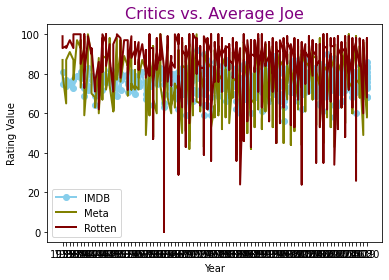

In [96]:
# #plot the boxoffice for the winning movie 

# x = found_list["year"];
# y1= found_list["IMDB"]; 
# y2= found_list["MetaScore"] ;
# y3= found_list["RottenTomatoes"];

# plt.title("Critics vs. Average Joe",size=16, color="purple")
# plt.xlabel("Year")
# plt.ylabel("Rating Value")

# # multiple line plots
# plt.plot( x, y1, marker='o',  color='skyblue', linewidth=2, label="IMDB")
# plt.plot( x, y2, marker='', color='olive', linewidth=2,label="Meta")
# plt.plot( x, y3, marker='', color='maroon', linewidth=2,label="Rotten")
# # show legend
# plt.legend()


# # show graph
# plt.show()

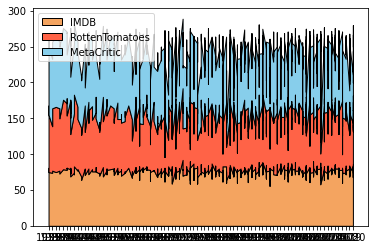

In [98]:
# x = found_list["year"];
# y = np.vstack([found_list["IMDB"], 
#                 found_list["MetaScore"],
#                 found_list["RottenTomatoes"]])

# stack_labels = ["IMDB",
#                "RottenTomatoes",
#                "MetaCritic"]
# colors = ["sandybrown",
#          "tomato",
#          "skyblue"]

# plt.stackplot(x,y,
#              labels=stack_labels,
#              colors=colors,
#              edgecolor="black")
# plt.legend(loc=2)
# plt.show()

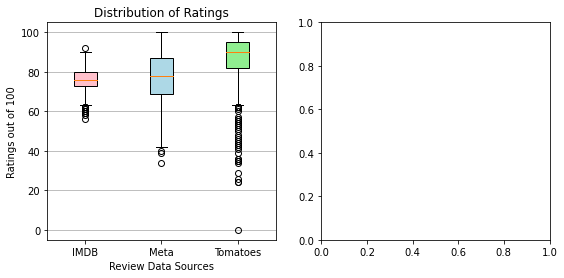

In [129]:
all_data = found_list["IMDB"], found_list["MetaScore"], found_list["RottenTomatoes"]
labels = ['IMDB', 'Meta', 'Tomatoes']


np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Distribution of Ratings')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Review Data Sources')
    ax.set_ylabel('Ratings out of 100')
plt.savefig("BoxPlotForAllReviews.png")
plt.show()

In [113]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = found_list["IMDB"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of IMDB ratings is: {lowerq}")
print(f"The upper quartile of IMDB ratings is: {upperq}")
print(f"The interquartile range of IMDB ratings is: {iqr}")
print(f"The the median of IMDB ratings is: {quartiles[0.5]} ")
print("The average IMDB rating is: " + str(round(found_list["IMDB"].mean(),2)))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of IMDB ratings is: 73.0
The upper quartile of IMDB ratings is: 80.0
The interquartile range of IMDB ratings is: 7.0
The the median of IMDB ratings is: 76.0 
The average IMDB rating is: 75.84
Values below 62.5 could be outliers.
Values above 90.5 could be outliers.


In [114]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = found_list["MetaScore"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of MetaScore ratings is: {lowerq}")
print(f"The upper quartile of MetaScore ratings is: {upperq}")
print(f"The interquartile range of MetaScore ratings is: {iqr}")
print(f"The the median of MetaScore ratings is: {quartiles[0.5]} ")
print("The average MetaScore rating is: " + str(round(found_list["IMDB"].mean(),2)))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of MetaScore ratings is: 69.0
The upper quartile of MetaScore ratings is: 87.0
The interquartile range of MetaScore ratings is: 18.0
The the median of MetaScore ratings is: 78.0 
The average MetaScore rating is: 75.84
Values below 42.0 could be outliers.
Values above 114.0 could be outliers.


In [115]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = found_list["RottenTomatoes"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of RottenTomatoes ratings is: {lowerq}")
print(f"The upper quartile of RottenTomatoes ratings is: {upperq}")
print(f"The interquartile range of RottenTomatoes ratings is: {iqr}")
print(f"The the median of RottenTomatoes ratings is: {quartiles[0.5]} ")
print("The average RottenTomatoes rating is: " + str(round(found_list["IMDB"].mean(),2)))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of RottenTomatoes ratings is: 82.0
The upper quartile of RottenTomatoes ratings is: 95.0
The interquartile range of RottenTomatoes ratings is: 13.0
The the median of RottenTomatoes ratings is: 90.0 
The average RottenTomatoes rating is: 75.84
Values below 62.5 could be outliers.
Values above 114.5 could be outliers.


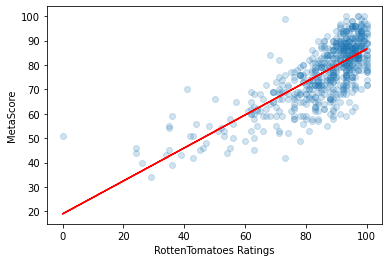

In [122]:
RottenTomatoes = found_list.RottenTomatoes
MetaScore = found_list.MetaScore
(slope, intercept, rvalue, pvalue, stderr) = linregress(RottenTomatoes, MetaScore)
regress_values = RottenTomatoes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(RottenTomatoes,MetaScore, alpha=.2)
plt.plot(RottenTomatoes,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("RottenTomatoes Ratings")
plt.ylabel("MetaScore")
plt.savefig("ScatterForMetaVsRotten.png")
plt.show()